In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load dataset (Already the dataset is splitted for train and test data)
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train_full.shape # It contains 60000 images with 28 x 28 pixel

(60000, 28, 28)

Each Pixel Intensity is represented as byte (0 to 255)

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
len(X_valid)

5000

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

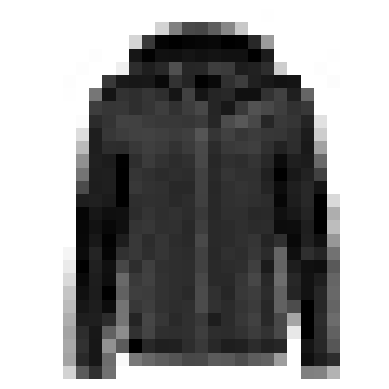

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
len(y_train)

55000

Here are the corresponding class names for y-label

In [ ]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [ ]:
y_train[0]

np.uint8(4)

So first image in the training set is a coat

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset

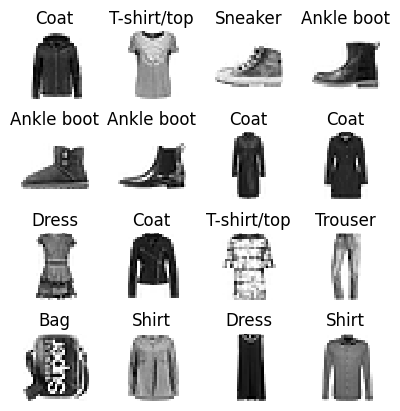

In [ ]:
n_rows = 4
n_cols = 4
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


##Now comes Neural Architecture

1. The input layer will have 784 input nodes as 28*28 for each image. (Flattening the input)
2. Then we can specify the layers. For my sake i am using 300 neurons in first layer and 100 neurons in second layer.
3. Output layer will have 10 neuron since we have 10 classes.
4. Activation functions of 1st and 2nd layers are ReLU.
5. Output function is Softmax since this is multiclass classification problem and softmax is the best.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Seed the weights - Actually this is not needed, but to have standard weights we do it

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

The summary above is as follows
1. Params
  1.1 First Layer = 300 Neuron * 784 Inputs + 300 = 235,500
  1.2 Second Layer = 100 Neuron * 300 Inputs from first layer + 100 = 30100
  1.3 Final output = 100 * 10 + 10 = 1010

Now lets Plot the neural network architecture with keras

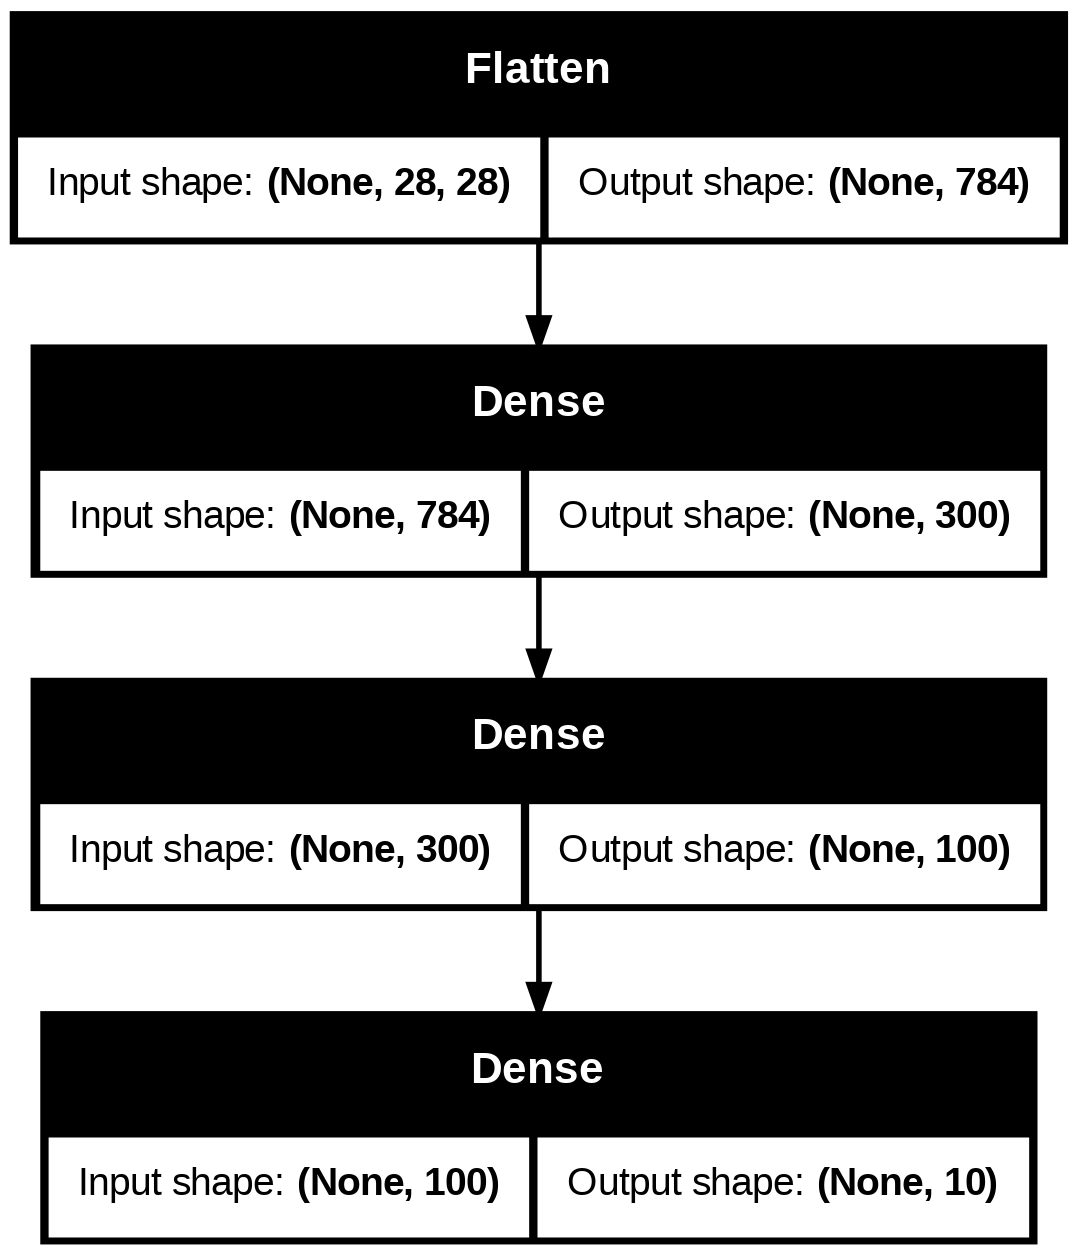

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

We can also find what is the layer name either dense or output

In [ ]:
flatten_layer = model.layers[0]
flatten_layer.name

'flatten'

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
hidden2 = model.layers[2]
hidden2.name

'dense_1'

In [ ]:
output_layer = model.layers[3]
output_layer.name

'dense_2'

We can get the weights matrix

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.02109466, -0.05537311, -0.01013399, ...,  0.03867042,
        -0.07315678,  0.04044609],
       [ 0.02693982,  0.0544904 , -0.05339837, ...,  0.06472395,
        -0.0493523 , -0.04343529],
       [ 0.01116747, -0.01597677,  0.05741756, ..., -0.07054955,
        -0.06349527,  0.00161742],
       ...,
       [ 0.00165583, -0.00735339,  0.03385314, ...,  0.01927958,
         0.01553188, -0.00723758],
       [ 0.02739042, -0.05959133,  0.02476463, ..., -0.03191322,
         0.01461831,  0.05718756],
       [ 0.01838816, -0.03214317,  0.07386842, ..., -0.01758249,
         0.03024558,  0.04522635]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

The above shape shows every column represents one image 28*28 = 784

If we take 4th column, it is the 4th image's data

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Now we need to specify the loss and optimizer and metrics to show

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

This is equivalent to

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

Now train the neural train

Note:
1. epochs is the 1 entire flow of neural network
2. I have added validation data for comparison



In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs = 20,
    validation_data = (X_valid, y_valid)
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8570 - loss: 0.3984 - val_accuracy: 0.8794 - val_loss: 0.3351
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8769 - loss: 0.3363 - val_accuracy: 0.8858 - val_loss: 0.3279
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8848 - loss: 0.3092 - val_accuracy: 0.8830 - val_loss: 0.3410
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8927 - loss: 0.2879 - val_accuracy: 0.8838 - val_loss: 0.3245
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8968 - loss: 0.2731 - val_accuracy: 0.8840 - val_loss: 0.3185
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9017 - loss: 0.2582 - val_accuracy: 0.8878 - val_loss: 0.3239
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9062 - loss: 0.2502 - val_accuracy: 0.8900 - val_loss: 0.3206
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9123 - loss: 0.2368 -

Actually in our case, the data is overfitted. It can be found through
1. validation loss > training loss
2. validation accuracy < training accuracy

We can overcome this by using regularization params before epoch starts - Refer keras API.

We can overcome this by hyperparamenter tuning by changing the optimizers, learning rates etc

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Now we can visualize the data

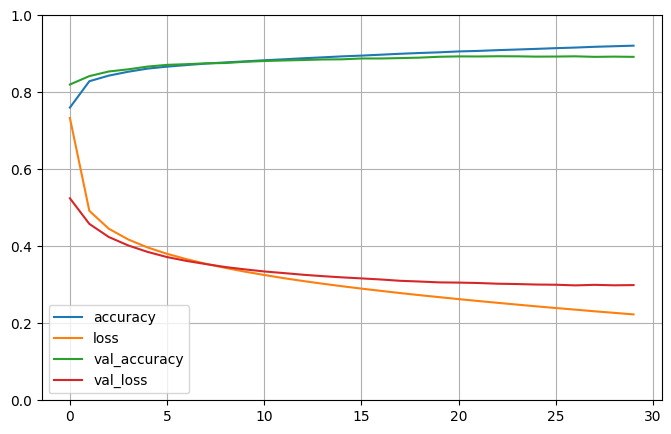

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Testing


In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8824 - loss: 0.3356


[0.33441615104675293, 0.8828999996185303]

In [ ]:
X_new = X_test[:3] # we are taking 3 inputs

**This is how the test data looks like**

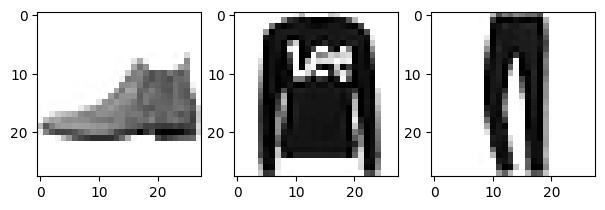

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

**Let's see what our neural network predicts**

In [ ]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')